In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import mpld3
import numpy as np
import sympy as sym

import payoffs
import plotting
import selection_functions

In [2]:
%matplotlib inline
plt.style.use("ggplot")
mpld3.enable_notebook()

# Monomorphic gamma model

In [3]:
class U(sym.Function):
    """Generic matching function"""
    
    is_real = True
    
    @classmethod
    def eval(cls, x):
        """We require the U(0)=0 and U(1)=1"""
        if x.is_Number and x is sym.S.Zero:
            return sym.S.Zero
        elif x.is_Number and x is sym.S.One:
            return sym.S.One

        
class UGA(U):
    """Matching function for G males."""
    

class UgA(U):
    """Matching function for g males."""


In [4]:
x1, x2, x3 = sym.symbols('x1, x2, x3')
T, R, P, S = sym.symbols('T, R, P, S')


In [5]:
def N(x1, x2, x3, UGA, UgA, T, R, P, S):
    out = (
           2 * R *((x1 + x2) * UGA(x1 + x3)**2 + (1 - (x1 + x2)) * UgA(x1 + x3)**2) +
           2 * P * ((x1 + x2) * (1 - UGA(x1 + x3))**2 + (1 - (x1 + x2)) * (1 - UgA(x1 + x3))**2) +
           2 * (S + T) * ((x1 + x2) * UGA(x1 + x3) * (1 - UGA(x1 + x3)) + (1 - (x1 + x2)) * UgA(x1 + x3) * (1 - UgA(x1 + x3)))
          )
    return out

In [6]:
def equation_motion_GA_share(x1, x2, x3, UGA, UgA, T, R, P, S):
    numerator = (
                 x1 * UGA(x1 + x3)**2 * (1) * x1 / (x1 + x3) * 2*R +  
                 x1 * UGA(x1 + x3)**2 * (1/2) * x3 / (x1 + x3) * 2*R +

                 x1 * (1 - UGA(x1 + x3))**2 * (1/2) * x2 / (1 - x1 - x3) * 2*P +
                 x1 * (1 - UGA(x1 + x3))**2 * (1/4) * (1 - x1 - x2 - x3) / (1 - x1 - x3) * 2*P +

                 x1 * 2 * UGA(x1 + x3) * (1 - UGA(x1 + x3)) * (1) * x1 / (x1 + x3) * S +
                 x1 * 2 * UGA(x1 + x3) * (1 - UGA(x1 + x3)) * (1/2) * x3 / (x1 + x3) * S + 
                 x1 * 2 * UGA(x1 + x3) * (1 - UGA(x1 + x3)) * (1/2) * x2 / (1 - x1 - x3) * T +
                 x1 * 2 * UGA(x1 + x3) * (1 - UGA(x1 + x3)) * (1/4) * (1 - x1 - x2 - x3) / (1 - x1 - x3) * T +

                 x2 * UGA(x1 + x3)**2 * (1/2) * x1 / (x1 + x3) * 2*R + 
                 x2 * UGA(x1 + x3)**2 * (1/4) * x3 / (x1 + x3) * 2*R +

                 x2 * (1 - UGA(x1 + x3))**2 * (0) +

                 x2 * 2 * UGA(x1 + x3) * (1 - UGA(x1 + x3)) * (1/2) * x1 / (x1 + x3) * S +
                 x2 * 2 * UGA(x1 + x3) * (1 - UGA(x1 + x3)) * (1/4) * x3 / (x1 + x3) * S +

                 x3 * UgA(x1 + x3)**2 * (1/2) * x1 / (x1 + x3) * 2*R +

                 x3 * (1 - UgA(x1 + x3))**2 * (1/4) * x2 / (1 - x1 - x3) * 2* P +

                 x3 * 2 * UgA(x1 + x3) * (1 - UgA(x1 + x3)) * (1/2) * x1 / (x1 + x3) * S +
                 x3 * 2 * UgA(x1 + x3) * (1 - UgA(x1 + x3)) * (1/4) * x2 / (1 - x1 - x3) * T +

                 (1 - x1 - x2 - x3) * UgA(x1 + x3)**2 * (1/4) * x1 / (x1 + x3) * 2*R +

                 (1 - x1 - x2 - x3) * (1 - UgA(x1 + x3))**2 * (0) +

                 (1 - x1 - x2 - x3) * 2 * UgA(x1 + x3) * (1 - UgA(x1 + x3)) * (1/4) * x1 / (x1 + x3) * S
                 )

    x1_dot = (numerator / N(x1, x2, x3, UGA, UgA, T, R, P, S)) - x1
    return x1_dot


In [7]:
f = equation_motion_GA_share(x1, 1-x1, 0, UGA, UgA, T, R, P, S)

In [8]:
f

-x1 + (1.0*P*x1*(-UGA(x1) + 1)**2 + 2*R*x1*UGA(x1)**2 + 1.0*R*(-x1 + 1)*UGA(x1)**2 + 2*S*x1*(-UGA(x1) + 1)*UGA(x1) + 0.5*S*(-2*x1 + 2)*(-UGA(x1) + 1)*UGA(x1) + 1.0*T*x1*(-UGA(x1) + 1)*UGA(x1))/(2*P*(-UGA(x1) + 1)**2 + 2*R*UGA(x1)**2 + (2*S + 2*T)*(-UGA(x1) + 1)*UGA(x1))

## The locus of potential equilibria (LPE)

Setting the equation of motion equal to zero, rearranging the resulting equation yields the locus of potential equilibria (LPE). The LPE represents, for each possible $x_1$, the value that $U_{GA}$ would have to take in order for that $x_1$ to be an equilbrium. 

\begin{align}
  L(x^*) \equiv x^* - \left(\frac{\big(R - S\big)U_{GA}^{*2} + SU_{GA}}{P + \big((T + S) - 2P\big)U_{GA}^* + \big((P + R) - (T + S)\big)U_{GA}^{*2}}\right) = 0\\
\end{align}

We already know that $x^*=0, U_{GA}^*=0$ and $x^*=1, U_{GA}^*=1$ are equilibria, so it follows that $L(0)=0$ and $L(1)=0$.


In [9]:
# solving for the LPE using Python
UGA_star, UGA_prime_star = sym.symbols("UGA_star, UGA_prime_star")
x1_star, = sym.solve(f, x1, implicit=True)
x1_star =  x1_star.subs({UGA(x1): UGA_star})
x1_star = sym.cancel(x1_star)
x1_star

1.0*(0.5*R*UGA_star**2 - 0.5*S*UGA_star**2 + 0.5*S*UGA_star)/(0.5*P*UGA_star**2 - 1.0*P*UGA_star + 0.5*P + 0.5*R*UGA_star**2 - 0.5*S*UGA_star**2 + 0.5*S*UGA_star - 0.5*T*UGA_star**2 + 0.5*T*UGA_star)

## Interactive plot of the locus of potential equilibria

In [10]:
locus_of_potential_equilibria = sym.lambdify((UGA_star, T, R, P, S), x1_star, modules="numpy")

In [11]:
def plot_locus_of_potential_equilibria(d1, T, R, P, S):
    assert T > R > P > S
    us = np.linspace(0, 1, 100)
    xs = locus_of_potential_equilibria(us, T, R, P, S)

    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    ax.plot(xs, us, label="LPE")
    ax.set_xlabel(r"$x_1^*$", fontsize=25)
    ax.set_ylabel(r"$U_{GA}^*$", rotation="horizontal", fontsize=25)
    ax.plot(us, us, 'k--')
    
    # add kirkpatrick selection functions for comparison
    kirkpatrick_us = selection_functions.kirkpatrick_selection(xs, d1)
    ax.plot(xs, kirkpatrick_us, label="Kirkpatrick")
    ax.legend()
    
    plt.show()

In [12]:
# sliders used to control the Prisoner's Dilemma Payoffs
T_slider = widgets.FloatSlider(value=25, min=0, max=100, step=0.1, description=r"$T$")
R_slider = widgets.FloatSlider(value=3, min=0, max=100, step=0.1, description=r"$R$")
P_slider = widgets.FloatSlider(value=2, min=0, max=100, step=0.1, description=r"$P$")
S_slider = widgets.FloatSlider(value=1, min=0, max=100, step=0.1, description=r"$S$")

# slider that controls the parameters of the selection function
d1_slider = widgets.FloatSlider(value=10, min=1.0, max=10, step=0.05, description=r"$d_1$")

w = widgets.interactive(plot_locus_of_potential_equilibria, d1=d1_slider,
                        T=T_slider, R=R_slider, P=P_slider, S=S_slider)
display(w)

A Jupyter Widget

# Stability of equilibria

Necessary and sufficient conditions for stability require that the derivative of the equation of motion with respect to $x_1$ be strictly negative when evaluated at the potential equilibrium.

In [13]:
f_jac = f.diff(x1, 1)

In [14]:
f_jac

-1 + (-2.0*P*x1*(-UGA(x1) + 1)*Derivative(UGA(x1), x1) + 1.0*P*(-UGA(x1) + 1)**2 + 4*R*x1*UGA(x1)*Derivative(UGA(x1), x1) + 2.0*R*(-x1 + 1)*UGA(x1)*Derivative(UGA(x1), x1) + 1.0*R*UGA(x1)**2 + 2*S*x1*(-UGA(x1) + 1)*Derivative(UGA(x1), x1) - 2*S*x1*UGA(x1)*Derivative(UGA(x1), x1) + 0.5*S*(-2*x1 + 2)*(-UGA(x1) + 1)*Derivative(UGA(x1), x1) - 0.5*S*(-2*x1 + 2)*UGA(x1)*Derivative(UGA(x1), x1) + 1.0*S*(-UGA(x1) + 1)*UGA(x1) + 1.0*T*x1*(-UGA(x1) + 1)*Derivative(UGA(x1), x1) - 1.0*T*x1*UGA(x1)*Derivative(UGA(x1), x1) + 1.0*T*(-UGA(x1) + 1)*UGA(x1))/(2*P*(-UGA(x1) + 1)**2 + 2*R*UGA(x1)**2 + (2*S + 2*T)*(-UGA(x1) + 1)*UGA(x1)) + (4*P*(-UGA(x1) + 1)*Derivative(UGA(x1), x1) - 4*R*UGA(x1)*Derivative(UGA(x1), x1) - (2*S + 2*T)*(-UGA(x1) + 1)*Derivative(UGA(x1), x1) + (2*S + 2*T)*UGA(x1)*Derivative(UGA(x1), x1))*(1.0*P*x1*(-UGA(x1) + 1)**2 + 2*R*x1*UGA(x1)**2 + 1.0*R*(-x1 + 1)*UGA(x1)**2 + 2*S*x1*(-UGA(x1) + 1)*UGA(x1) + 0.5*S*(-2*x1 + 2)*(-UGA(x1) + 1)*UGA(x1) + 1.0*T*x1*(-UGA(x1) + 1)*UGA(x1))/(2*P

### Equilibrium with $x_1^*=0$

In [15]:
f_jac.subs({x1: 0})

-1 + (1.0*P + 1.0*S*Subs(Derivative(UGA(x1), x1), (x1,), (0,)))/(2*P)

\begin{align}
    %-1 + \frac{P + SU_{GA}'(0)}{2P} & < 0 \\
    %\frac{P + SU_{GA}'(0)}{2P} & < 1 \\
    %P + SU_{GA}'(0) & < 2P \\
    %SU_{GA}'(0) & < P \\
    U_{GA}'(0) & < \frac{P}{S}
\end{align}

### Equilibrium with $x_1^* = 1$

In [16]:
f_jac.subs({x1: 1})

-1 + (-4*R*Subs(Derivative(UGA(x1), x1), (x1,), (1,)) + (2*S + 2*T)*Subs(Derivative(UGA(x1), x1), (x1,), (1,)))/(2*R) + (4*R*Subs(Derivative(UGA(x1), x1), (x1,), (1,)) + 1.0*R - 2*S*Subs(Derivative(UGA(x1), x1), (x1,), (1,)) - 1.0*T*Subs(Derivative(UGA(x1), x1), (x1,), (1,)))/(2*R)

\begin{align}
%-1 + \frac{-4RU_{GA}'(1) + (2S + 2T)U_{GA}'(1)}{2R} + \frac{4RU_{GA}'(1) + R - 2SU_{GA}'(1) - TU_{GA}'(1)}{2R} < 0 \\
%\frac{-4RU_{GA}'(1) + (2S + 2T)U_{GA}'(1) + 4RU_{GA}'(1) + R - 2SU_{GA}'(1) - TU_{GA}'(1)}{2R} < 1 \\
%\frac{TU_{GA}'(1) + R}{2R} < 1 \\
%TU_{GA}'(1) + R < 2R \\
%TU_{GA}'(1) < R \\
U_{GA}'(1) < \frac{R}{T} \\
\end{align}

### Equilibrium with $0 < x^* < 1$

Sufficient conditions to guarantee the existence of a stable, interior equilibrium are that the stability conditions for both corner equilibria are violated. Necessary and sufficient conditions are more difficult to state...

In [17]:
evaluated_f_jac = f_jac.subs({sym.Derivative(UGA(x1), x1): UGA_prime_star, UGA(x1): UGA_star, x1: x1_star})

Stability of the equilibrium involves determining whether the following function of $U_{GA}^*$, $U_{GA}^{'*}$ and payoffs $T,R,P,S$ is negative! 

In [18]:
evaluated_f_jac

-1 + (-2.0*P*UGA_prime_star*(-UGA_star + 1)*(0.5*R*UGA_star**2 - 0.5*S*UGA_star**2 + 0.5*S*UGA_star)/(0.5*P*UGA_star**2 - 1.0*P*UGA_star + 0.5*P + 0.5*R*UGA_star**2 - 0.5*S*UGA_star**2 + 0.5*S*UGA_star - 0.5*T*UGA_star**2 + 0.5*T*UGA_star) + 1.0*P*(-UGA_star + 1)**2 + 2.0*R*UGA_prime_star*UGA_star*(-1.0*(0.5*R*UGA_star**2 - 0.5*S*UGA_star**2 + 0.5*S*UGA_star)/(0.5*P*UGA_star**2 - 1.0*P*UGA_star + 0.5*P + 0.5*R*UGA_star**2 - 0.5*S*UGA_star**2 + 0.5*S*UGA_star - 0.5*T*UGA_star**2 + 0.5*T*UGA_star) + 1) + 4.0*R*UGA_prime_star*UGA_star*(0.5*R*UGA_star**2 - 0.5*S*UGA_star**2 + 0.5*S*UGA_star)/(0.5*P*UGA_star**2 - 1.0*P*UGA_star + 0.5*P + 0.5*R*UGA_star**2 - 0.5*S*UGA_star**2 + 0.5*S*UGA_star - 0.5*T*UGA_star**2 + 0.5*T*UGA_star) + 1.0*R*UGA_star**2 - 0.5*S*UGA_prime_star*UGA_star*(-2.0*(0.5*R*UGA_star**2 - 0.5*S*UGA_star**2 + 0.5*S*UGA_star)/(0.5*P*UGA_star**2 - 1.0*P*UGA_star + 0.5*P + 0.5*R*UGA_star**2 - 0.5*S*UGA_star**2 + 0.5*S*UGA_star - 0.5*T*UGA_star**2 + 0.5*T*UGA_star) + 2) - 2.0*S

In [19]:
# the above expression can be reduce to a ratio of two, two-dimensional polynomial functions in U and U'...
sym.powsimp(sym.cancel(evaluated_f_jac))

(-0.25*P**2*UGA_star**4 + 1.0*P**2*UGA_star**3 - 1.5*P**2*UGA_star**2 + 1.0*P**2*UGA_star - 0.25*P**2 - 0.5*P*R*UGA_prime_star*UGA_star**2 + 0.5*P*R*UGA_prime_star*UGA_star - 0.5*P*R*UGA_star**4 + 1.0*P*R*UGA_star**3 - 0.5*P*R*UGA_star**2 + 0.25*P*S*UGA_prime_star*UGA_star**2 - 0.5*P*S*UGA_prime_star*UGA_star + 0.25*P*S*UGA_prime_star + 0.5*P*S*UGA_star**4 - 1.5*P*S*UGA_star**3 + 1.5*P*S*UGA_star**2 - 0.5*P*S*UGA_star + 0.5*P*T*UGA_star**4 - 1.5*P*T*UGA_star**3 + 1.5*P*T*UGA_star**2 - 0.5*P*T*UGA_star - 0.25*R**2*UGA_star**4 + 0.5*R*S*UGA_star**4 - 0.5*R*S*UGA_star**3 + 0.25*R*T*UGA_prime_star*UGA_star**2 + 0.5*R*T*UGA_star**4 - 0.5*R*T*UGA_star**3 - 0.25*S**2*UGA_star**4 + 0.5*S**2*UGA_star**3 - 0.25*S**2*UGA_star**2 - 0.5*S*T*UGA_star**4 + 1.0*S*T*UGA_star**3 - 0.5*S*T*UGA_star**2 - 0.25*T**2*UGA_star**4 + 0.5*T**2*UGA_star**3 - 0.25*T**2*UGA_star**2)/(0.5*P**2*UGA_star**4 - 2.0*P**2*UGA_star**3 + 3.0*P**2*UGA_star**2 - 2.0*P**2*UGA_star + 0.5*P**2 + 1.0*P*R*UGA_star**4 - 2.0*P*R*UGA

In [20]:
numerator, denominator = sym.fraction(sym.powsimp(sym.cancel(evaluated_f_jac)))

Can we prove that the denominator is strictly positive? If so, then we have reduced the problem of finding the sign of the Jacobian to finding the sign of the expression in the numerator. Yes! The denominator can be factored into an expression that is strictly positive!

In [27]:
sym.factor(denominator)

1.0*(0.5*P*UGA_star**2 - 1.0*P*UGA_star + 0.5*P + 0.5*R*UGA_star**2 - 0.5*S*UGA_star**2 + 0.5*S*UGA_star - 0.5*T*UGA_star**2 + 0.5*T*UGA_star)**2

Now we can solve the numerator for $U'_{GA}(x^*)$.  This will allow us to write the condition for which the Jacobian will be negative as an upper bound on $U'_{GA}(x^*)$.

In [29]:
upper_bound, = sym.solve(numerator, UGA_prime_star)

In [31]:
upper_bound

(P**2*UGA_star**4 - 4.0*P**2*UGA_star**3 + 6.0*P**2*UGA_star**2 - 4.0*P**2*UGA_star + P**2 + 2.0*P*R*UGA_star**4 - 4.0*P*R*UGA_star**3 + 2.0*P*R*UGA_star**2 - 2.0*P*S*UGA_star**4 + 6.0*P*S*UGA_star**3 - 6.0*P*S*UGA_star**2 + 2.0*P*S*UGA_star - 2.0*P*T*UGA_star**4 + 6.0*P*T*UGA_star**3 - 6.0*P*T*UGA_star**2 + 2.0*P*T*UGA_star + R**2*UGA_star**4 - 2.0*R*S*UGA_star**4 + 2.0*R*S*UGA_star**3 - 2.0*R*T*UGA_star**4 + 2.0*R*T*UGA_star**3 + S**2*UGA_star**4 - 2.0*S**2*UGA_star**3 + S**2*UGA_star**2 + 2.0*S*T*UGA_star**4 - 4.0*S*T*UGA_star**3 + 2.0*S*T*UGA_star**2 + T**2*UGA_star**4 - 2.0*T**2*UGA_star**3 + T**2*UGA_star**2)/(-2.0*P*R*UGA_star**2 + 2.0*P*R*UGA_star + P*S*UGA_star**2 - 2.0*P*S*UGA_star + P*S + R*T*UGA_star**2)

In [30]:
# this is a slightly different expression than in our current notes!
sym.factor(upper_bound)

-1.0*(1.0*P*UGA_star**2 - 2.0*P*UGA_star + 1.0*P + 1.0*R*UGA_star**2 - 1.0*S*UGA_star**2 + 1.0*S*UGA_star - 1.0*T*UGA_star**2 + 1.0*T*UGA_star)**2/(2.0*P*R*UGA_star**2 - 2.0*P*R*UGA_star - 1.0*P*S*UGA_star**2 + 2.0*P*S*UGA_star - 1.0*P*S - 1.0*R*T*UGA_star**2)

After fiddling around with the above expression we arrive at the following condition for a negative Jacobian and a stable interior equilibrium at $0 < x^* < 1$.

\begin{align}
  %  U'_{GA}(x^*) <& \frac{-1.0*(PU_{GA}(x^*)^2 - 2PU_{GA}(x^*) + P + RU_{GA}(x^*)^2 - SU_{GA}(x^*)^2 + SU_{GA}(x^*) - TU_{GA}(x^*)^2 + TU_{GA}(x^*))^2}{(2PRU_{GA}(x^*)^2 - 2PRU_{GA}(x^*) - PSU_{GA}(x^*)^2 + 2PSU_{GA}(x^*) - PS - RTU_{GA}(x^*)^2)} \\
  %  U'_{GA}(x^*) <& \frac{(PU_{GA}(x^*)^2 - 2PU_{GA}(x^*) + P + RU_{GA}(x^*)^2 - SU_{GA}(x^*)^2 + SU_{GA}(x^*) - TU_{GA}(x^*)^2 + TU_{GA}(x^*))^2}{(-2PRU_{GA}(x^*)^2 + 2PRU_{GA}(x^*) + PSU_{GA}(x^*)^2 - 2PSU_{GA}(x^*) + PS + RTU_{GA}(x^*)^2)} \\ % distribute the -1 through the denominator!
  %  U'_{GA}(x^*) <& \frac{(RU_{GA}(x^*)^2 + PU_{GA}(x^*)^2 - SU_{GA}(x^*)^2 - TU_{GA}(x^*)^2 + SU_{GA}(x^*) + TU_{GA}(x^*) - 2PU_{GA}(x^*) + P)^2}{(RTU_{GA}(x^*)^2 + PSU_{GA}(x^*)^2 - 2PRU_{GA}(x^*)^2 + 2PRU_{GA}(x^*) - 2PSU_{GA}(x^*) + PS)} \\
    U'_{GA}(x^*) <& \frac{\bigg(\big((R + P) - (T + S)\big)U_{GA}(x^*)^2 + \big((T + S) - 2P\big)U_{GA}(x^*) + P\bigg)^2}{\big(R(T - 2P) + PS\big)U_{GA}(x^*)^2 + 2P\big(R - S\big)U_{GA}(x^*) + PS} \\
\end{align}

We should be able to recover the stability conditions for the corner equilibria as a special case of the above condition. Recall that $U_{GA}(0) = 0$ and $U_{GA}(1)=1$. When $x^*=0$ the condition reduces to $U'_{GA}(0) < \frac{P}{S}$ and when $x^*=1$ the condition reduces to $U'_{GA}(1) < \frac{R}{T}$.

Can also use a graphical approach to check the correctness of the above condition.  The above condition should be the zero contour in a contour plot of the value of the Jacobian as a function of $U_{GA}$ and $U'_{GA}$.

In [32]:
# vectorized numerical function created from our symbolic expression
numeric_f_jac = sym.lambdify((UGA_star, UGA_prime_star, T, R, P, S), evaluated_f_jac, modules="numpy")

In [33]:
def plot_jacobian(T, R, P, S):

    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    ax.set_ylabel(r"$U_{GA}^*$", fontsize=20, rotation="horizontal")
    ax.set_xlabel(r"$U_{GA}^{'*}$", fontsize=20)
    ax.set_title(r"Negative values of $\frac{\partial \dot{x}_1}{\partial x_1}$ indicate stability!", fontsize=25)
    ax.grid("off")

    equilibrium_selection_probs = np.linspace(0, 1, 100).reshape(-1, 1)
    equilibrium_selection_derivs = np.linspace(0, 10, 1000).reshape(1, -1) # sensible UGA'(0) >= 1
    Z = numeric_f_jac(equilibrium_selection_probs, equilibrium_selection_derivs, T, R, P, S)
    cax = ax.imshow(Z, origin="lower", aspect="auto", vmin=-0.5, vmax=1.0)

    levels = np.arange(-0.25, 1.25, 0.25)
    contours = ax.contour(Z, levels=levels, colors='w', origin='lower')
    ax.clabel(contours, contours.levels, inline=True, fontsize=10)
    
    # adjust the tick labels
    locs, _ = plt.xticks()
    plt.xticks(locs[1:], np.linspace(0, 10, locs.size-1))
    locs, _ = plt.yticks()
    plt.yticks(locs[1:], np.linspace(0, 1, locs.size-1))

    plt.show()

In [34]:
mpld3.disable_notebook()  # don't need interactive plotting for this!

# sliders used to control the Prisoner's Dilemma Payoffs
T_slider = widgets.FloatSlider(value=25, min=0, max=100, step=0.1, description=r"$T$")
R_slider = widgets.FloatSlider(value=3, min=0, max=100, step=0.1, description=r"$R$")
P_slider = widgets.FloatSlider(value=2, min=0, max=100, step=0.1, description=r"$P$")
S_slider = widgets.FloatSlider(value=1, min=0, max=100, step=0.1, description=r"$S$")

w = widgets.interactive(plot_jacobian, T=T_slider, R=R_slider, P=P_slider, S=S_slider)
display(w)

A Jupyter Widget

Pick a particular equilibrium selection probability on the vertical axis. Scanning to the right across the various values of the selection function derivative tells you when an equilibrium with your chosen selection probability will be stable.

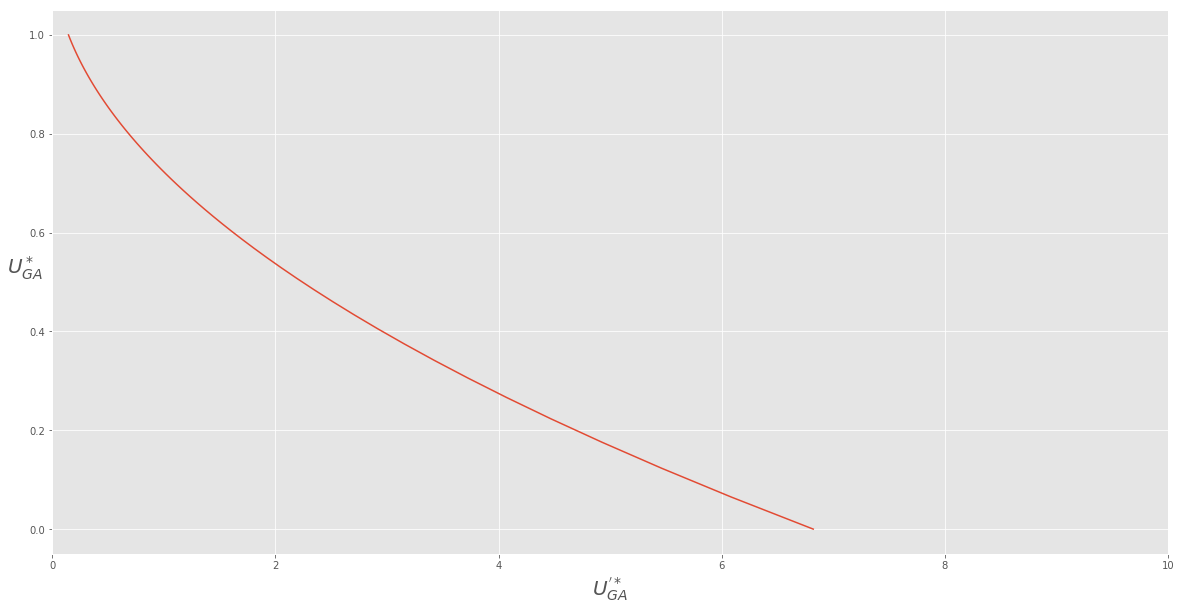

In [49]:
# I want to plot the selection function on top of the contour plot above.
# possibly also plot the LPE and then play around with the parameters and show
# how the satable equilibria are always in regions where the contour is negative!
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
xs = np.linspace(0, 1, 100)
u_derivs = selection_functions.kirkpatrick_selection_derivative(xs, 6.82)
us = selection_functions.kirkpatrick_selection(xs, 6.82)
ax.plot(u_derivs, us)
ax.set_ylabel(r"$U_{GA}^*$", fontsize=20, rotation="horizontal")
ax.set_xlabel(r"$U_{GA}^{'*}$", fontsize=20)
ax.set_xlim(0, 10)
plt.show()

## Invadability

Restrict the full model to obtain a monomorphic $\gamma$ equilibrium, add a small amount of individuals carrying the $g$ allele of the $\gamma$ gene and simulate.

In [61]:
# sliders used to control the initial condition
x1_slider = widgets.FloatSlider(value=0.5, min=0.0, max=1.0, step=0.01, description=r"$x_1$")
x2_slider = widgets.FloatSlider(value=0.5, min=0.0, max=1.0, step=0.01, description=r"$x_2$")
x3_slider = widgets.FloatSlider(value=0.0, min=0.0, max=1.0, step=0.01, description=r"$x_3$")

# sliders used to control the Prisoner's Dilemma Payoffs
T_slider = widgets.FloatSlider(value=10, min=0, max=100, step=0.1, description=r"$T$")
R_slider = widgets.FloatSlider(value=8, min=0, max=100, step=0.1, description=r"$R$")
P_slider = widgets.FloatSlider(value=6, min=0, max=100, step=0.1, description=r"$P$")
S_slider = widgets.FloatSlider(value=4, min=0, max=100, step=0.1, description=r"$S$")

# slider used to control which selection function is being used
U_slider = widgets.Dropdown(options=["kirkpatrick", "seger"], index=0, description=r"$U$")

# slider that controls the parameters of the selection function
d1_slider = widgets.FloatSlider(value=1, min=0.0, max=10, step=0.05, description=r"$d_1$")
d3_slider = widgets.FloatSlider(value=1, min=0.0, max=10, step=0.05, description=r"$d_3$")

# slider used to control the mutation rate
e_slider = widgets.FloatSlider(value=0.0, min=0.0, max=1.0, step=1e-3, description=r"$\epsilon$", readout_format=".3f")

# slider that controls max simulation time
max_time_slider = widgets.IntSlider(value=25, min=1, max=500, description=r"$\max t$")

w = widgets.interactive(plotting.plot_generalized_sexual_selection, x1=x1_slider, x2=x2_slider, x3=x3_slider,
                        selection_function=U_slider, d1=d1_slider, d3=d3_slider, 
                        T=T_slider, R=R_slider, P=P_slider, S=S_slider, 
                        mutation_rate=e_slider, max_time=max_time_slider)
display(w)

A Jupyter Widget

In [63]:
12 / 7

1.7142857142857142